Los datos fueron obtenidos del https://www.kaggle.com/c/interbank20


In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'seaborn'

In [2]:
!

"conda" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.


In [9]:
df_rcc_train = pd.read_parquet('/01Fuente/rcc_train.parquet.gzip')

ImportError: Unable to find a usable engine; tried using: 'pyarrow', 'fastparquet'.
pyarrow or fastparquet is required for parquet support

In [2]:
df_rcc_test  = pd.read_parquet('/content/drive/MyDrive/05.MaestríaUCM/02.Cursos/10.MachineLearningConR/02Evaluación/01Fuente/rcc_test.parquet.gzip')
df_rcc_train = pd.read_parquet('/content/drive/MyDrive/05.MaestríaUCM/02.Cursos/10.MachineLearningConR/02Evaluación/01Fuente/rcc_train.parquet.gzip')

df_censo_train = pd.read_parquet('/content/drive/MyDrive/05.MaestríaUCM/02.Cursos/10.MachineLearningConR/02Evaluación/01Fuente/censo_train.parquet.gzip')
df_censo_test  = pd.read_parquet('/content/drive/MyDrive/05.MaestríaUCM/02.Cursos/10.MachineLearningConR/02Evaluación/01Fuente/censo_test.parquet.gzip')

df_sunat_train  = pd.read_parquet('/content/drive/MyDrive/05.MaestríaUCM/02.Cursos/10.MachineLearningConR/02Evaluación/01Fuente/sunat_train.parquet.gzip')
df_sunat_test  = pd.read_parquet('/content/drive/MyDrive/05.MaestríaUCM/02.Cursos/10.MachineLearningConR/02Evaluación/01Fuente/sunat_test.parquet.gzip')

df_se_train  = pd.read_parquet('/content/drive/MyDrive/05.MaestríaUCM/02.Cursos/10.MachineLearningConR/02Evaluación/01Fuente/se_train.parquet.gzip')
df_se_test  = pd.read_parquet('/content/drive/MyDrive/05.MaestríaUCM/02.Cursos/10.MachineLearningConR/02Evaluación/01Fuente/se_test.parquet.gzip')

y_train  = pd.read_parquet('/content/drive/MyDrive/05.MaestríaUCM/02.Cursos/10.MachineLearningConR/02Evaluación/01Fuente/y_train.parquet.gzip')

df_productos  = pd.read_parquet('/content/drive/MyDrive/05.MaestríaUCM/02.Cursos/10.MachineLearningConR/02Evaluación/01Fuente/productos.parquet.gzip')

In [11]:
df_rcc_train['fecha'] = pd.to_datetime(df_rcc_train['codmes'],format='%Y%m')


In [30]:
for index, row in graph1.iterrows():
  print(index,row)

0 fecha        2017-03-01 00:00:00
codmes                   2299337
key_value                 271195
Name: 0, dtype: object
1 fecha        2017-04-01 00:00:00
codmes                   2341813
key_value                 274087
Name: 1, dtype: object
2 fecha        2017-05-01 00:00:00
codmes                   2365299
key_value                 277157
Name: 2, dtype: object
3 fecha        2017-06-01 00:00:00
codmes                   2407525
key_value                 279899
Name: 3, dtype: object
4 fecha        2017-07-01 00:00:00
codmes                   2444190
key_value                 284332
Name: 4, dtype: object
5 fecha        2017-08-01 00:00:00
codmes                   2475888
key_value                 287315
Name: 5, dtype: object
6 fecha        2017-09-01 00:00:00
codmes                   2524942
key_value                 289606
Name: 6, dtype: object
7 fecha        2017-10-01 00:00:00
codmes                   2551045
key_value                 293824
Name: 7, dtype: object
8 fecha 

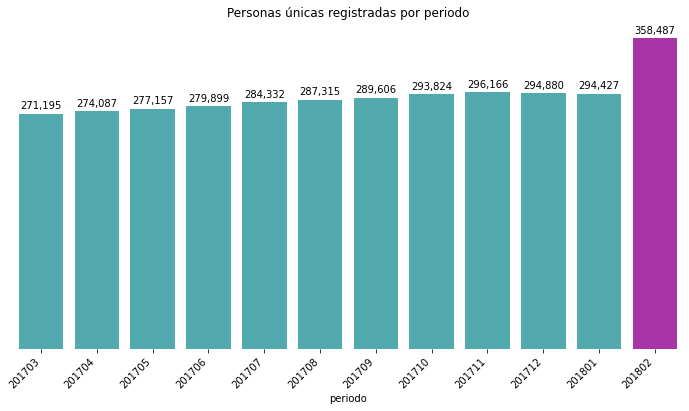

In [60]:
#graph1 = df_rcc_train.groupby('fecha',as_index=False).agg({'codmes':'count','key_value':'nunique'})

fig, ax = plt.subplots(figsize = (12,6))
bar = sns.barplot(data=graph1,x='fecha',y='key_value',color='#42b7bd',ax=ax)
sns.despine(bottom = True, left = True)

patch_h = []    
for patch in bar.patches:
    reading = patch.get_height()
    patch_h.append(reading)

    ax.annotate(format(patch.get_height(), ',.0f'), (patch.get_x() + patch.get_width() / 2., patch.get_height()), 
       ha = 'center', va = 'center', xytext = (0, 8), textcoords = 'offset points')

idx_tallest = np.argmax(patch_h)   
bar.patches[idx_tallest].set_facecolor('#a834a8') 

x_dates = graph1['fecha'].dt.strftime('%Y%m').sort_values().unique()
ax.set_xticklabels(labels=x_dates, rotation=45, ha='right')

ax.set(title='Personas únicas registradas por periodo')
ax.set(xlabel='periodo')
ax.set(ylabel=None)
ax.set(yticklabels=[]) 
ax.tick_params(left=False)

In [65]:
graph2 = df_rcc_train.groupby(['codmes','condicion'],as_index=False).agg({'fecha':'count','key_value':'nunique'})